# 1. [20 pts] First step, let's improve our POS tag understanding.

#< VBN >< NNP >, etc.

In [1]:
import nltk
import csv

# Consider the first dozen reviews and parse them by sentence parsing, word parsing and then POS tag the list of words per sentence. 

In [2]:
def ie_preprocess(document):
    #Sentence Parse
    sentences = nltk.sent_tokenize(document)
#     #Word Parse
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
#     #POS Tag
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [3]:
import csv
path='./movie_data.csv'
num_lines=12
dozen_reviews=[]
with open(path, 'r', encoding="utf-8") as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        next(reader)
        i=0
        for i,line in enumerate(reader):
            review=line[0]
            Sentiment=line[1]
            if(i >= 12):
                break;
            preprocessed=ie_preprocess(review)
            dozen_reviews.append(preprocessed)

# When you spot the named entities, examine the tags around them. Do you also observe that most of the named entities are tagged as NNP? Guess some patterns to improve parsing patterns, such as VBN, NNP,ETC

Yes, most of the named entities are tagged as NNP or a Proper Singular Noun. One way that we could possibly increase the success of parsing patterns, is to train models on sentences with POS tags, as well as entities that are already known. This way, we can allow an AI model to learn the location of named entities in sentence strucutures, if they are even present. One example of this kind of sentence strucuture is the verb past participle, which is a type of sentence structure that easily allows us to identify named entities.

# 2. [40 pts] 

# Improve your parsing by removing "<br /><br />", symbols, etc. 

In [4]:
import re
def ie_preprocess_2(document):
    #Sentence Parse
    document = re.sub('<br />', '', document)
    document = re.sub(r'[^\w\s]', '', document)
    sentences = nltk.sent_tokenize(document)
#     #Word Parse
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
#     #POS Tag
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [5]:
import csv
num_lines=12
dozen_reviews=[]
with open(path, 'r', encoding="utf-8") as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        next(reader)
        i=0
        for i,line in enumerate(reader):
            review=line[0]
            Sentiment=line[1]
            if(i >= 12):
                break;
            preprocessed = ie_preprocess_2(review)
            dozen_reviews.append(preprocessed)

# Print out the found named entities.
# Hint: Textbook chapter 7 will help.
# Hint: Print the chunked subtree by the following

# Based on your examinations in (1.) build an improved chunker with your tag patterns and find those POS tag patterns with RegexpParser.

In [6]:
grammar = r"""
    NE: 
        {<NNP>+}
        {<NNPS>+}
        {<.>+<VBD>}
"""
chunkparser = nltk.RegexpParser(grammar)

i=0
list_ne=[]
for review in dozen_reviews:
    sentences=review[0]
    terms= sentences
    result = chunkparser.parse(terms)
    # Extract and print the named entities
    for subtree in result.subtrees(filter=lambda t: t.label() == 'NE'):
        list_ne.append(subtree.leaves())
        print(" ".join([tok for tok, pos in subtree.leaves()]))
    

Martha Moxley Maggie Grace
Belle Haven Greenwich Connecticut
Mischief Night
Halloween
Twentytwo
Mark Fuhrman Christopher Meloni
LA
OJ Simpson
Idaho
Stephen Weeks Andrew Mitchell
Steve Carroll Robert Forster
Greenwich
Kennedy
Mark
Martha
My
Brazil
Kris Kristofferson
Age
Disappearance
Holy Moly
Kris
Kris
Ive
zippo
Grade F
Dont
DVD Believe
SPOILER Do
Coyote Ugly
VHS DVD A
ChickFeelGoodFlick
Dream
New York
McNally Director
Especially Piper Perabo
Jerseys
Coyote Ugly
John Goodman
Jerry Bruckheimer
First Gone
Rock
Con Air THAT
Bruckheimer
Charlies
Angels
ONE
DVD
A Chorus Line Every
Attenborough
DirectorCassie
Cassies
Braik
Zorak
Spac Ghost Coast
Coast
Adult Swim Brak
Adult Swims
Adult Swim
Adult Swim
Hey
Nathan Detroit Frank Sinatra
New Yorks
Confident
Sky Masterson Marlon Brando
Sarah Brown Jean Simmons Guys
Dolls
Mankiewiczs New York City
Ive
Jean Simmons
Id
Her
Sarah
Havana
Bell
Simmons
Brando
Sam Goldwyn
Goldwyns
Simmons
Audrey Hepburn
Brando
Crash Course
Most
Hail
Chief
Crash Course
All

# 3. [20 pts] Apply some other improvements such as parsing the previous output in (2.) results with regular expressions, such as checking for capitalized first letter, filtering out names with symbols, digits, etc. Creativity is the key here. Reconsider the pattern you used in (2.) and try others if possible.

In [7]:
import nltk
from nltk.corpus import stopwords

# Get a list of English stopwords
stop_words = stopwords.words('english')
mod_stop_words=[]

for word in stop_words:
    mod_stop_words.append(re.sub(r'[^\w\s]', '', word).lower())
mod_stop_words=set(mod_stop_words)

remove stopword entries

In [8]:
removed_cout=0
cout=0
pattern = re.compile(r'[A-Za-z]')
for named_entity in list_ne:
    if(len(named_entity) == 1):
        if(named_entity[0][0].lower() in mod_stop_words):
            removed_cout+=1
            list_ne.remove(named_entity)
    else:
        for entity in named_entity:
            if not re.match("^[a-zA-Z]+$", entity[0]):
                cout+=1
                list_ne.remove(named_entity)
                break
print(removed_cout,cout)

4 1


# 4. [20 pts] Plot the most frequent named entities that you identify in reviews for both sentiment categories 0 and 1.

In [9]:
import re
import csv
import nltk
from collections import defaultdict

import re
import nltk
from nltk.corpus import stopwords

def ie_preprocess(document):
    # Remove HTML tags and non-alphanumeric characters
    document = re.sub(r'<br />|[^\w\s]', '', document)
    
    # Tokenize the document into sentences
    sentences = nltk.sent_tokenize(document)
    
    # Tokenize each sentence and remove stopwords
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    stop_words = set(stopwords.words('english'))
    sentences = [[word for word in sent if word.lower() not in stop_words] for sent in sentences]
    
    # Perform part-of-speech tagging
    sentences = [nltk.pos_tag(sent) for sent in sentences]

    return sentences

sentences = defaultdict(list)
processed=0
with open(path, 'r', encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    next(reader)

    for line in reader:
        review = line[0]
        preprocessed = ie_preprocess(review)
        label = line[1]
        sentences[label].append(preprocessed)
        processed+=1
        print(processed,'processed')

sent_0 = sentences['0']
sent_1 = sentences['1']

1 processed
2 processed
3 processed
4 processed
5 processed
6 processed
7 processed
8 processed
9 processed
10 processed
11 processed
12 processed
13 processed
14 processed
15 processed
16 processed
17 processed
18 processed
19 processed
20 processed
21 processed
22 processed
23 processed
24 processed
25 processed
26 processed
27 processed
28 processed
29 processed
30 processed
31 processed
32 processed
33 processed
34 processed
35 processed
36 processed
37 processed
38 processed
39 processed
40 processed
41 processed
42 processed
43 processed
44 processed
45 processed
46 processed
47 processed
48 processed
49 processed
50 processed
51 processed
52 processed
53 processed
54 processed
55 processed
56 processed
57 processed
58 processed
59 processed
60 processed
61 processed
62 processed
63 processed
64 processed
65 processed
66 processed
67 processed
68 processed
69 processed
70 processed
71 processed
72 processed
73 processed
74 processed
75 processed
76 processed
77 processed
78 proce

In [10]:
grammar = r"""
    NE: 
        {<NNP>+}
        {<NNPS>+}
        {<.>+<VBD>}
"""
chunkparser = nltk.RegexpParser(grammar)

i=0
list_ne0=[]
for review in sent_0:
    sentences=review[0]
    terms= sentences
    result = chunkparser.parse(terms)
    i+=1
    # Extract and print the named entities
    print(i,'done')
    for subtree in result.subtrees(filter=lambda t: t.label() == 'NE'):
        list_ne0.append(str(subtree.leaves()[0][0]))

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

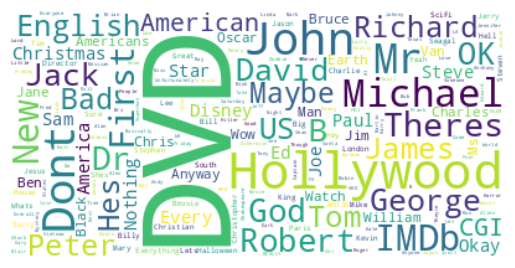

In [11]:
from collections import Counter
most_common_counter0=Counter(list_ne0)

import matplotlib.pyplot as plt
import wordcloud as wc
import matplotlib.pyplot as plt
remove_words=['Well','Id','Ive','Im','Thats','Oh','Ill','Yes','Avoid','Please']
for word in remove_words:
    del most_common_counter0[word]

wordcloud = wc.WordCloud(max_font_size=100, background_color="white").fit_words(most_common_counter0)
plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()

In [12]:
import nltk
import matplotlib.pyplot as plt
import wordcloud as wc
import matplotlib.pyplot as plt
grammar = r"""
    NE: 
        {<NNP>+}
        {<NNPS>+}
        {<.>+<VBD>}
"""
chunkparser = nltk.RegexpParser(grammar)

i=0
list_ne1=[]
for review in sent_1:
    sentences=review[0]
    terms= sentences
    result = chunkparser.parse(terms)
    i+=1
    # Extract and print the named entities
    print(i,'done')
    for subtree in result.subtrees(filter=lambda t: t.label() == 'NE'):
        list_ne1.append(str(subtree.leaves()[0][0]))

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123 done
1

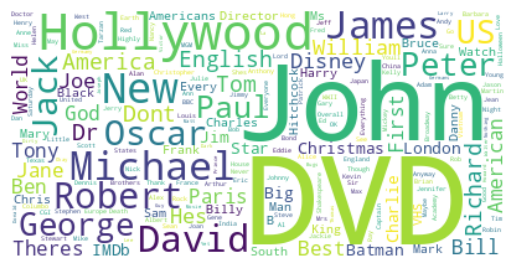

In [13]:
from collections import Counter
most_common_counter1=Counter(list_ne1)
remove_words=['Well','Id','Ive','Im','Thats','Oh','Ill','Yes','Avoid','Please','Great','Mr']
for word in remove_words:
    del most_common_counter1[word]
wordcloud = wc.WordCloud(max_font_size=100, background_color="white").fit_words(most_common_counter1)
plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()